## VISUAL PORTION OF EMOTION RECOGNITION

In [1]:
import pandas as pd
import numpy as np 
import glob 
import os
import math
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path = r'D:\iiitdhmi\audio-video'

Just creating a single list to sequentially store paths of each image. 

In [3]:
data = []

In [1]:
'''
0 : 01- AV, 02- V
2 :

'''

In [5]:
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
#         mode.append(file.split('-')[0])
#         em.append(file.split('-')[2])
#         paths.append(os.path.join(path,folder,file))
        data.append([os.path.join(path,folder,file),file.split('-')[0],file.split('-')[2]])
       
df = pd.DataFrame(data,columns = ['paths','mode','em'])

In [6]:
import cv2
from tqdm import tqdm

The last index having path to video of actor 20 will be noted and used to divide into train and test sets. 

In [7]:
df[df['paths'].str.contains('Actor_20' )]

,paths,mode,em
2280,D:\iiitdhmi\audio-video\Actor_20\01-01-01-01-0...,01,01
2281,D:\iiitdhmi\audio-video\Actor_20\01-01-01-01-0...,01,01
2282,D:\iiitdhmi\audio-video\Actor_20\01-01-01-01-0...,01,01
2283,D:\iiitdhmi\audio-video\Actor_20\01-01-01-01-0...,01,01
2284,D:\iiitdhmi\audio-video\Actor_20\01-01-02-01-0...,01,02
...,...,...,...
2395,D:\iiitdhmi\audio-video\Actor_20\02-01-08-01-0...,02,08
2396,D:\iiitdhmi\audio-video\Actor_20\02-01-08-02-0...,02,08
2397,D:\iiitdhmi\audio-video\Actor_20\02-01-08-02-0...,02,08
2398,D:\iiitdhmi\audio-video\Actor_20\02-01-08-02-0...,02,08


The paths of each video have been loaded along with their respective emotion labels, the mode of the video has also been retained just in case it's require later on. 

In [8]:
train= df[:2400]
test = df[2400:]

* For computational ease all frames sampled from the video dataset will be stored firstly in a particularly path and then retrieved when necessary. 

In [17]:
for i in tqdm(range(train.shape[0])):
    count = 0
    videofile = train['paths'][i]
    cap = cv2.VideoCapture(videofile)
    cap.set(cv2.CAP_PROP_FPS, 29)
    frate = cap.get(5)
    while(cap.isOpened()):
        
        frameId = cap.get(1)
        ret, frame = cap.read()
        
        if (ret!=True):
            break
        
#         if (frameId % math.floor(frate) == 0.0):
# #             print(frameId)
        dirt = r'D:\iiitdhmi\frame ret test'
        filename =dirt +'\\'+ train['mode'][i] + '\\' + train['em'][i] + '\\' + videofile.split('\\')[3]+'_'+'frame_'+str(count)+'.jpg'
        count+=1
        cv2.imwrite(filename,frame)
   
    cap.release()
     
    

100%|████████████████████████████████████████████████████████████████████████████| 2400/2400 [1:04:07<00:00,  1.60s/it]


In [29]:
math.floor(frate)

29

In [11]:
path = r"D:\iiitdhmi\frame ret test"
data = []
for mode in os.listdir(path):
    for em in os.listdir(os.path.join(path,mode)):
         for img in os.listdir(os.path.join(path,mode,em)):
                data.append([os.path.join(path,mode,em,img), em])
dfm = pd.DataFrame(data, columns = 'image emotion'.split())
dfm

,image,emotion
0,D:\iiitdhmi\frame ret test\01\01\Actor_01_fram...,01
1,D:\iiitdhmi\frame ret test\01\01\Actor_01_fram...,01
2,D:\iiitdhmi\frame ret test\01\01\Actor_01_fram...,01
3,D:\iiitdhmi\frame ret test\01\01\Actor_01_fram...,01
4,D:\iiitdhmi\frame ret test\01\01\Actor_01_fram...,01
...,...,...
37807,D:\iiitdhmi\frame ret test\02\08\Actor_20_fram...,08
37808,D:\iiitdhmi\frame ret test\02\08\Actor_20_fram...,08
37809,D:\iiitdhmi\frame ret test\02\08\Actor_20_fram...,08
37810,D:\iiitdhmi\frame ret test\02\08\Actor_20_fram...,08


* After the retrieving the frames, it can be observed that approximately 37.8k video sample images have been sliced out in total. 

**just checking the number of samples for each emotion**

In [7]:
dfm['emotion'].value_counts()

07    5171
05    5069
02    4830
03    4782
04    4654
06    4600
08    4457
01    4249
Name: emotion, dtype: int64

* the images will be converted to gray scale and then processed further for the very ease of it. 

* since the color of the face is not going to contribute so much to facial expressions as do the face contours and flexes, they images have been reduced to grayscale. 

* the grayscale images have again been resized to three channel images. 

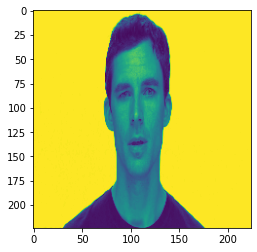

In [9]:
plt.imshow(cv2.resize(cv2.cvtColor(cv2.imread(dfm['image'][0]), cv2.COLOR_BGR2GRAY), (224,224),interpolation = cv2.INTER_CUBIC))

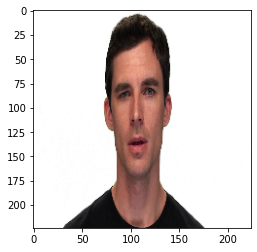

In [10]:
plt.imshow(cv2.resize(cv2.imread(dfm['image'][0])[:,:, ::-1], (224,224), interpolation = cv2.INTER_CUBIC))

In [31]:
train_img = []

for i in dfm['image']:
    train_img.append(cv2.resize(cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY), (226,226),interpolation = cv2.INTER_CUBIC).reshape(226,226,1))

##### the entire collection of samples have been appended into a list which is later on converted to array. 

In [10]:
train_img = np.asarray(train_img)

In [11]:
# plt.imshow(np.repeat(train_img[..., np.newaxis], 3, -1).reshape(1441, 224, 224, 3)[8])

train_img.shape

(37812, 224, 224, 1)

In [12]:
train_img = np.repeat(train_img[..., np.newaxis], 3, -1).reshape(train_img.shape[0], 224, 224, 3)

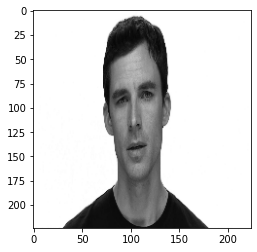

In [13]:
plt.imshow(train_img[8])

In [14]:
train_img.shape

(37812, 224, 224, 3)

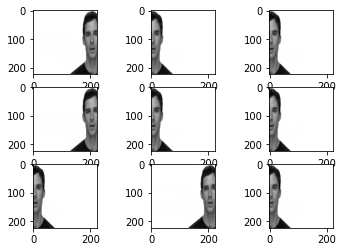

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_img = train_img[0]

samples = np.expand_dims(test_img,0)

datagen = ImageDataGenerator(width_shift_range = [-100,100])

it = datagen.flow(samples, batch_size = 1)

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

###### the above is just a preview to the kind of effects that can be on the images given. 


### Firstly let's try the xception model and check if it's able to learn the essential features. 

# XCEPTION

In [9]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers

In [16]:
base_model = Xception(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=8)

In [17]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(8, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

#### defining the training dataset

In [9]:
x_train = train_img

In [10]:
from sklearn.preprocessing import LabelEncoder

y_train_le = dfm['emotion'].astype(int)

le = LabelEncoder()
y_train_le = le.fit_transform(y_train_le)
y_train_le

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_le)

In [14]:
print(y_train[0],y_train.shape)

[1. 0. 0. 0. 0. 0. 0. 0.] (37812, 8)


##### configuring data augmentation

In [22]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [23]:
datagen.fit(x_train)

In [24]:
train_data_flow = datagen.flow(x_train, y_train, batch_size=4,
         subset=None)

##### train process beginning

In [25]:
optimizer = Adam(lr=1e-10)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(train_data_flow, epochs=20, batch_size=None, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

Train for 361 steps
Epoch 1/20
361/361 [==============================] - 81s 224ms/step - loss: 2.2097 - accuracy: 0.1207
Epoch 2/20
361/361 [==============================] - 72s 199ms/step - loss: 2.2154 - accuracy: 0.1249
Epoch 3/20
361/361 [==============================] - 72s 199ms/step - loss: 2.2025 - accuracy: 0.1270
Epoch 4/20
361/361 [==============================] - 72s 200ms/step - loss: 2.2081 - accuracy: 0.1235
Epoch 5/20
361/361 [==============================] - 72s 199ms/step - loss: 2.2140 - accuracy: 0.1187
Epoch 6/20
361/361 [==============================] - 72s 199ms/step - loss: 2.2167 - accuracy: 0.1194
Epoch 7/20
361/361 [==============================] - 72s 199ms/step - loss: 2.1995 - accuracy: 0.1270
Epoch 8/20
361/361 [==============================] - 72s 199ms/step - loss: 2.2139 - accuracy: 0.1187
Epoch 9/20
361/361 [==============================] - 71s 197ms/step - loss: 2.2064 - accuracy: 0.1166
Epoch 10/20
361/361 [==============================] 

KeyboardInterrupt: 

**Initial Opinions:**

* The low accuracy could be because of many probable reasons which are yet to be explored. Like, not enough layers, overfitting, maybe the images are too compressed for the model to learn any feature, learning rate probably needs to be more.  

#### reconfiguring the model

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors

x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(units = 1024, activation = 'relu')(x)
# # x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)
x = tf.keras.layers.Dense(units = 256, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
# x = tf.keras.layers.Dense(units = 128, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units = 64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(units = 32, activation = 'relu')(x)
# # A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(8, activation = 'softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
optimizer = Adam(lr=1e-12)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])   

model.fit(train_data_flow, epochs=1, batch_size=None, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

#### Inference from Xception model performance: the accuracy does not seem even to come above a low slab of accuracy. Hence it can be deemed not useful in our case atleast. 

# TRY VGG 16 

##### vgg face weights

The the vgg 16 face network ease ewas rightly built and trained to capture the important facial details. 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

* There can not be a better candidate than the vgg 16 face descriptor since it has been pretrained to learn the features of a face. 

#### loading the weights

In [12]:
model = vgg_face()
WEIGHTS_FILE = "vgg_face_weights.h5"
model.load_weights(WEIGHTS_FILE)

In [13]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [20]:
embds = np.zeros((train_img.shape[0], 2622))

In [22]:
embds = np.zeros((train_img.shape[0], 2622))
for i, d in enumerate(train_img):
                                 try:
                                        image = d                                        
                                        image = (image / 255.).astype(np.float32) # Normalisation
                                        image = cv2.resize(image, dsize = (224,224))
                                        embds[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]
                                 except:
                                    print('something is wrong')
                                    break
 

**The face embeddings of each sample can be stored for later use since these embeddings are essential for the model to learn and dentify the emotions from the face.**

In [27]:
with open('embds.npy', 'wb') as f:
    np.save(f, embds)

In [5]:
with open('embds.npy', 'rb') as f:
    a = np.load(f)

In [31]:
(a == embds).any()

True

In [15]:
x_train = a

In [17]:
print(x_train.shape,y_train.shape)

(37812, 2622) (37812, 8)


In [25]:
model = Sequential()
model.add(Dense(256, input_shape = (2622,),kernel_initializer='he_normal',activation=None))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

In [26]:
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=1, batch_size=100, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

Train on 37812 samples
37812/37812 [==============================] - 2s 57us/sample - loss: 1.7970 - accuracy: 0.3826


* Extracting the facial embeddings using the VGG 16 face descriptor has proven quite worthy on just one epoch of training. 

In [29]:
sgd = SGD(lr=1e-4, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=200, batch_size=125, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

Train on 37812 samples
Epoch 1/200
37812/37812 [==============================] - 2s 53us/sample - loss: 0.1335 - accuracy: 0.9648
Epoch 2/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1346 - accuracy: 0.9632
Epoch 3/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1358 - accuracy: 0.9621
Epoch 4/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1300 - accuracy: 0.9651
Epoch 5/200
37812/37812 [==============================] - 1s 36us/sample - loss: 0.1293 - accuracy: 0.9642
Epoch 6/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1304 - accuracy: 0.9638
Epoch 7/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1289 - accuracy: 0.9647
Epoch 8/200
37812/37812 [==============================] - 1s 36us/sample - loss: 0.1309 - accuracy: 0.9638
Epoch 9/200
37812/37812 [==============================] - 1s 37us/sample - loss: 0.1257 - accuracy: 0.9667
Epoch

### Within 200 epochs, it was possible to converge all the training errors. However, it's important to test the meaning of this high accuracy with real world data: 

**check the below link for the results of this model**

https://www.linkedin.com/posts/vishak-arudhra-1b1b00140_navarasafacialemotionchallenge-machinelearning-activity-6832278770980917248-Ib_F 

#### The above post contains remarks of the results obtained when used on faces of actors from a particular film. 

In [15]:
from tensorflow.keras.models import model_from_json
import os

# model_json = model.to_json()

# with open('face_emote_model.json',"w") as json_file:
#     json_file.write(model_json)

# model.save_weights('face_emote_weights.h5')

In [16]:
json_file  = open('face_emote_model.json','r')
loaded_model_json  = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('face_emote_weights.h5')

##### testing

In [17]:
def preprocess(image):
    
    image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (226,226),interpolation = cv2.INTER_CUBIC).reshape(226,226,1)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)    
    image = (image / 255.).astype(np.float32) # Normalisation
    image = cv2.resize(image, dsize = (224,224))
    embd = vgg_face_descriptor.predict(np.expand_dims(image, axis=0))[0]
    
    return embd
        

* the above is just a simple essential preprocessing pipeline before feeding into the model for emotion recognition. 

In [18]:

'''01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised'''
emodic = {'1':'Neutral','2':'Calm','3':'Happy','4':'Sad','5':'Angry','6':'Fearful','7':'Disgust','8':'Surprised'}

In [25]:
cap = cv2.VideoCapture(r"C:\Users\Vishak\Downloads\Navarasa _ Mani Ratnam & Jayendra Panchapakesan _ Netflix.mp4")
font = cv2.FONT_HERSHEY_SIMPLEX
 
# Check if camera opened successfully
if (cap.isOpened()== False):
     print("Error opening video stream or file")
pred_avg = []
# Read until video is completed
while (cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        img = preprocess(frame)
        prediction = loaded_model.predict(np.expand_dims(img,0))
        pred = np.argmax(prediction)+1
        
        pred_avg.append(pred)
        cv2.putText(frame, 
                emodic[str(pred)], 
                (50, 50), 
                font, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4)
  
        # Display the resulting frame
        cv2.imshow('Frame', frame)
 
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
 
    # Break the loop
    else:
        break
 
# When everything done, release the video capture object
cap.release()
cv2.destroyAllWindows()

In [66]:
print(dfm['emotion'][0],' ', y_train[0], ' ', np.argmax(dfm['emotion'][0]))


01   [1. 0. 0. 0. 0. 0. 0. 0.]   0


###### preparing test data

In [19]:
test_im = []
test_em = []

In [20]:
test

,paths,mode,em
2400,D:\iiitdhmi\audio-video\Actor_21\01-01-01-01-0...,01,01
2401,D:\iiitdhmi\audio-video\Actor_21\01-01-01-01-0...,01,01
2402,D:\iiitdhmi\audio-video\Actor_21\01-01-01-01-0...,01,01
2403,D:\iiitdhmi\audio-video\Actor_21\01-01-01-01-0...,01,01
2404,D:\iiitdhmi\audio-video\Actor_21\01-01-02-01-0...,01,02
...,...,...,...
2875,D:\iiitdhmi\audio-video\Actor_24\02-01-08-01-0...,02,08
2876,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-0...,02,08
2877,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-0...,02,08
2878,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-0...,02,08


In [ ]:
for i in tqdm(test.index):
    count = 0
    videofile = test['paths'][i]
    cap = cv2.VideoCapture(videofile)
    cap.set(cv2.CAP_PROP_FPS, 29)
    frate = cap.get(5)
    while(cap.isOpened()):
        
        frameId = cap.get(1)
        ret, frame = cap.read()
        test_im.append(frame)
        test_em.append(test['em'][i])
        if (ret!=True):
            break
        
#         if (frameId % math.floor(frate) == 0.0):
# #             print(frameId)
#         dirt = r'D:\iiitdhmi\frame ret test'
#         filename =dirt +'\\'+ train['mode'][i] + '\\' + train['em'][i] + '\\' + videofile.split('\\')[3]+'_'+'frame_'+str(count)+'.jpg'
#         count+=1
#         cv2.imwrite(filename,frame)
   
    cap.release()
     

 12%|█████████▍                                                                       | 56/480 [02:22<41:33,  5.88s/it]

#### final remarks: 

The visual only recognition of emotion worked decently well even with the test datasets from the original provided datasets. **Although, the classification report could not be generated since the my GPU (GTX 1650) kept crashing when exracting samples out of the test set videos.**

* So should you execute the model as laslty done above, you should get a pretty decent performance. 

 ## SPEECH PORTION OF THE EMOTION RECOGNITION

##### IMPORTING ESSENTIAL LIBRARIES (some here and some along the course)

In [2]:
import pandas as pd
import numpy as np 
import glob 
import os
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
pd.set_option('display.max_colwidth', -1)

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


##### RETRIEVING VIDEO FILE PATHS

In [3]:
path = r'D:\iiitdhmi\audio-video'
data = []
for folder in os.listdir(path):
    for file in os.listdir(os.path.join(path, folder)):
#         mode.append(file.split('-')[0])
#         em.append(file.split('-')[2])
#         paths.append(os.path.join(path,folder,file))
        data.append([os.path.join(path,folder,file),file.split('-')[0],file.split('-')[2]])
       
df = pd.DataFrame(data,columns = ['paths','mode','em'])

In [4]:
df

,paths,mode,em
0,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-01-01.mp4,01,01
1,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-02-01.mp4,01,01
2,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-01-01.mp4,01,01
3,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-02-01.mp4,01,01
4,D:\iiitdhmi\audio-video\Actor_01\01-01-02-01-01-01-01.mp4,01,02
...,...,...,...
2875,D:\iiitdhmi\audio-video\Actor_24\02-01-08-01-02-02-24.mp4,02,08
2876,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-01-01-24.mp4,02,08
2877,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-01-02-24.mp4,02,08
2878,D:\iiitdhmi\audio-video\Actor_24\02-01-08-02-02-01-24.mp4,02,08


Just creating a column for the extracts of the audio files. 

In [6]:
df['audio_paths'] = ''

c:\users\vishak\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df

,paths,mode,em,audio_paths
0,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-01-01.mp4,01,01,
1,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-02-01.mp4,01,01,
2,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-01-01.mp4,01,01,
3,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-02-01.mp4,01,01,
4,D:\iiitdhmi\audio-video\Actor_01\01-01-02-01-01-01-01.mp4,01,02,
...,...,...,...,...
2815,D:\iiitdhmi\audio-video\Actor_24\01-01-08-01-02-02-24.mp4,01,08,
2816,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-01-01-24.mp4,01,08,
2817,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-01-02-24.mp4,01,08,
2818,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-02-01-24.mp4,01,08,


#### moviepy was an essential library to read the video files through their paths and save their audio extracts at the specified paths. 

In [8]:
import moviepy.editor as mp

In [9]:
out_path = r"D:\iiitdhmi\emotion_sounds"

In [10]:
for idx in list(df.index):
    my_clip = mp.VideoFileClip(df['paths'][idx])
    my_clip.audio.write_audiofile(out_path+'\\'+'emotion_audio_'+df['em'][idx]+'_'+str(idx)+'.wav')
    df['audio_paths'][idx] = out_path+'\\'+'emotion_audio_'+df['em'][idx]+'_'+str(idx)+'.wav'

In [11]:
df = df[df['mode']=='01']
df

,paths,mode,em,audio_paths
0,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-01-01.mp4,01,01,D:\iiitdhmi\emotion_sounds\emotion_audio_01_0.wav
1,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-01-02-01.mp4,01,01,D:\iiitdhmi\emotion_sounds\emotion_audio_01_1.wav
2,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-01-01.mp4,01,01,D:\iiitdhmi\emotion_sounds\emotion_audio_01_2.wav
3,D:\iiitdhmi\audio-video\Actor_01\01-01-01-01-02-02-01.mp4,01,01,D:\iiitdhmi\emotion_sounds\emotion_audio_01_3.wav
4,D:\iiitdhmi\audio-video\Actor_01\01-01-02-01-01-01-01.mp4,01,02,D:\iiitdhmi\emotion_sounds\emotion_audio_02_4.wav
...,...,...,...,...
2815,D:\iiitdhmi\audio-video\Actor_24\01-01-08-01-02-02-24.mp4,01,08,D:\iiitdhmi\emotion_sounds\emotion_audio_08_2815.wav
2816,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-01-01-24.mp4,01,08,D:\iiitdhmi\emotion_sounds\emotion_audio_08_2816.wav
2817,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-01-02-24.mp4,01,08,D:\iiitdhmi\emotion_sounds\emotion_audio_08_2817.wav
2818,D:\iiitdhmi\audio-video\Actor_24\01-01-08-02-02-01-24.mp4,01,08,D:\iiitdhmi\emotion_sounds\emotion_audio_08_2818.wav


In [12]:
df['audio_paths'][10]

'D:\\iiitdhmi\\emotion_sounds\\emotion_audio_02_10.wav'

In [13]:
df['paths'][10]

'D:\\iiitdhmi\\audio-video\\Actor_01\\01-01-02-02-02-01-01.mp4'

#### LIBROSA was another essential library which was pivotal in manipulating and processing the audio signal data and capture the essential portions for emotion recognition. 

In [14]:
import librosa

The sampling rate is normally 22,050 Khz but it can be set at other values too based on the necessity. 

In [167]:
aud, sr = librosa.load(df['audio_paths'][0])

In [168]:
aud

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [24]:
import IPython.display as ipd

ipd.Audio(df['audio_paths'][0])

* The **mel frequency cepstral coeffecients** were an essential featue to extract from the **audio signal** to capture the " emotion " from the voice. 

In [25]:
mfccs = librosa.feature.mfcc(aud, sr=44100)
print(mfccs.shape)

(20, 145)


In [26]:
aud1, sr1 = librosa.load(df['audio_paths'][10])
ipd.Audio(df['audio_paths'][10])

In [29]:
mfccs1 = librosa.feature.mfcc(aud1, sr=44100)
print(mfccs1.shape)

(20, 184)


### So it can be observed that the sequence of the **cepstral coeffecients** keep changing with every audio sample and therefore the solution to that will be detailed further ahead. 

In [39]:
mfccs1.shape[1]

184

In [ ]:
'''
mfccs = []
for i in tqdm(X):
    mfcc = librosa.feature.mfcc(y=i, sr=44000, n_mfcc=20)
    mfcc = mfcc.T
    mfccs.append(mfcc)
    
'''

In [21]:
train_df = df.loc[:2339]
test_df = df.loc[2339:]

In [132]:
mfcc_dat = []
mfcc_seq_len = []
for path in tqdm(train_df['audio_paths']):
    aud, sr = librosa.load(path, sr=44100)
    mfccs = librosa.feature.mfcc(aud, sr=44100, n_mfcc=40)
    mfcc_dat.append(mfccs)
    mfcc_seq_len.append(mfccs.shape[1])

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:49<00:00, 24.13it/s]




* First the **mfccs** are stored in a lists initially. 
*


* The seqence lengths are stored in another list to later calculate the average for **truncation** and **padding** purposes. 

In [134]:
seq_mean  = sum(mfcc_seq_len)//len(mfcc_seq_len)
seq_mean

321

### In the code below based on the average MFCC sequence length, the length of each audio sample is either truncated or padded to form a uniform mfcc dataset. 

In [136]:
mfccs_dat = []
for dat in mfcc_dat:
    if dat.shape[1]<seq_mean:
        alt_dat = np.pad(dat, ((0,0),(0,abs(dat.shape[1]-seq_mean))), mode='constant', constant_values=0)
        mfccs_dat.append(alt_dat.T)
    elif dat.shape[1]>seq_mean:
        mfccs_dat.append(dat[:,:seq_mean].T)
    else:
        mfccs_dat.append(dat.T)

In [137]:
print(np.array(mfccs_dat).shape)
x_train = np.array(mfccs_dat)

(1200, 321, 40)


In [138]:
x_train.shape

(1200, 321, 40)

### preparing the target data

* converting the emotion labels from **strings** to **label encoded** to **one-hot-encoded**. 

In [96]:
y_train_raw = train_df['em']
y_train_raw

0       01
1       01
2       01
3       01
4       02
        ..
2335    08
2336    08
2337    08
2338    08
2339    08
Name: em, Length: 1200, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train_raw)
print(le.classes_)
print('')
print(y_train_enc)

In [30]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [99]:
y_train = to_categorical(y_train_enc)
y_train.shape

(1200, 8)

In [100]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

##### model building

In [39]:
# from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras import layers

### Usually RNNs are used to process audio signal dataset but the array nature of mfcc extracts allows it to be disposable to CNNs as well which 'statistically' perform great but in our case it was not quite so...

In [148]:
model = Sequential()
model.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(321,40),kernel_initializer='he_normal',activation=None))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, 5,padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Dense(128))
model.add(layers.Dense(64))
model.add(layers.Dense(8))
model.add(layers.Activation('softmax'))

In [157]:
sgd = SGD(lr=1e-20, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=1, batch_size=50, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

Train on 1200 samples
1200/1200 [==============================] - 1s 547us/sample - loss: nan - accuracy: 0.0667


##### the accuracy was subpar and the loss wouldn't budge from NaN value. 

In [155]:
np.any(np.isnan(x_train))

False

In [150]:
sgd = SGD(lr=1e-12, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=100, batch_size=50, verbose= 1)
score = model.evaluate(x_train, y_train, verbose=0)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 1s 563us/sample - loss: nan - accuracy: 0.0667
Epoch 2/100
1200/1200 [==============================] - ETA: 0s - loss: nan - accuracy: 0.066 - 0s 225us/sample - loss: nan - accuracy: 0.0667
Epoch 3/100
1200/1200 [==============================] - 0s 228us/sample - loss: nan - accuracy: 0.0667
Epoch 4/100
1200/1200 [==============================] - 0s 227us/sample - loss: nan - accuracy: 0.0667
Epoch 5/100
1200/1200 [==============================] - 0s 221us/sample - loss: nan - accuracy: 0.0667
Epoch 6/100
1200/1200 [==============================] - 0s 222us/sample - loss: nan - accuracy: 0.0667
Epoch 7/100
1200/1200 [==============================] - 0s 228us/sample - loss: nan - accuracy: 0.0667
Epoch 8/100
1200/1200 [==============================] - 0s 225us/sample - loss: nan - accuracy: 0.0667
Epoch 9/100
1200/1200 [==============================] - 0s 231us/sample - loss: nan - accuracy: 0.0667
Ep

## Therefore I had to explore other Audio Signal Features to somehow recognize the emotion in them. 

In [15]:
def audio_features(file_title, mfcc, chroma, mel, spec_cent, spec_bw, roll_off, zcr):
        audio,sr = librosa.load(file_title, sr = 44100)
#         print(type(audio))
        sample_rate = sr
        if chroma:
            stft=np.abs(librosa.stft(audio))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if spec_cent: 
            spec_cent = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sample_rate))
            result=np.hstack((result, spec_cent))
        if spec_bw:
            spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate))
            result=np.hstack((result, spec_bw))
        if roll_off:
            roll_off = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sample_rate))
            result=np.hstack((result, roll_off))
        if zcr: 
            zcr = np.mean(librosa.feature.zero_crossing_rate(audio))
            result=np.hstack((result, zcr))
            
        return result

* Above is a pipeline which extracts the following features : 
* **chroma** : distributin of energy over the pitches of the audio signal. 
* **zero crossing rate** : a measure of the oscillatory rate of the audio signal. 
* **spectral bandwidth** : another measure of the concentration of energy of the signal. 
* **spectral roll off** : it is a form of showing the signal envelopes to differentiate between the **signal formants**. 
* **spectral centroid** : a measure of the central frequencies of energy. 

In [17]:
trues = [True, True, True, True, True, True, True]

In [18]:
result = audio_features(df['audio_paths'][10], *trues)

In [19]:
result.shape

(184,)

In [22]:
aud_data = []
emo_data = []

for idx in tqdm(train_df.index):
    aud_data.append(audio_features(train_df['audio_paths'][idx], *trues))
    emo_data.append(train_df['em'][idx])

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [02:47<00:00,  7.15it/s]


#### Running every audio sample through the pipeline. 

In [23]:
aud_data = np.array(aud_data)

In [24]:
y_train = np.array(list(map(int, emo_data)))

In [327]:
# from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [328]:
model = MLPClassifier(hidden_layer_sizes=(2000,), learning_rate='adaptive', max_iter=100000, activation = 'tanh')

In [329]:
model.fit(aud_data,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(2000,),
              learning_rate='adaptive', max_iter=100000)

##### preparing test data

In [25]:
test_aud = []
test_emo = []
for idx in tqdm(test_df.index):
    test_aud.append(audio_features(test_df['audio_paths'][idx], *trues))
    test_emo.append(test_df['em'][idx])

100%|████████████████████████████████████████████████████████████████████████████████| 241/241 [00:45<00:00,  5.33it/s]


In [26]:
n_test_emo = np.array(list(map(int, test_emo)))

In [333]:
y_pred = model.predict(test_aud)
accuracy = accuracy_score(y_true=n_test_emo, y_pred=y_pred)

In [334]:
accuracy

0.22821576763485477

* the Multi Layer Perceptron performed poorly even with such a great number of iterations and hidden layer values. 

#### trying neural networks

#### one hot encoding

In [32]:
le = LabelEncoder()

y_train_le = le.fit_transform(y_train)

In [33]:
y_train_cat = to_categorical(y_train_le)

In [34]:
y_train_cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

##### model definition

In [47]:
model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(aud_data.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))


### scaling the signal data gave a colossal boost in the training accuracy. 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
aud_scaled = scaler.fit_transform(aud_data)

In [50]:
sgd = SGD(lr=1e-5, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(aud_scaled, y_train_cat, epochs=2000, batch_size=10, verbose= 1)
score = model.evaluate(aud_data, y_train_cat, verbose=0)

Train on 1200 samples
Epoch 1/2000
1200/1200 [==============================] - 1s 457us/sample - loss: 1.9214 - accuracy: 0.2783
Epoch 2/2000
1200/1200 [==============================] - 0s 197us/sample - loss: 1.9249 - accuracy: 0.2683
Epoch 3/2000
1200/1200 [==============================] - 0s 203us/sample - loss: 1.9142 - accuracy: 0.2767
Epoch 4/2000
1200/1200 [==============================] - 0s 208us/sample - loss: 1.9131 - accuracy: 0.2767
Epoch 5/2000
1200/1200 [==============================] - 0s 192us/sample - loss: 1.9140 - accuracy: 0.2767
Epoch 6/2000
1200/1200 [==============================] - 0s 208us/sample - loss: 1.9136 - accuracy: 0.2758
Epoch 7/2000
1200/1200 [==============================] - 0s 194us/sample - loss: 1.9076 - accuracy: 0.2642
Epoch 8/2000
1200/1200 [==============================] - 0s 192us/sample - loss: 1.9091 - accuracy: 0.2867
Epoch 9/2000
1200/1200 [==============================] - 0s 190us/sample - loss: 1.9062 - accuracy: 0.2783
Epoch 

In [54]:
test_aud_scaled = scaler.fit_transform(np.array(test_aud))

In [55]:
test_aud_scaled.shape

(241, 184)

In [58]:
y_test_cat = to_categorical(le.fit_transform(n_test_emo))

In [59]:
y_test_cat.shape

(241, 8)

In [60]:
score = model.evaluate(test_aud_scaled, y_test_cat, verbose=0)

In [61]:
score

[2.409900336344707, 0.43983403]

##### even with neural networks not much test accuracy could be achieved using the audio data. 